In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler


In [3]:
df=pd.read_csv("G:\Machine_Learning\ML Projects\BankCreditRiskGermanData\Data\GermanData.csv")

In [4]:
df

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,4,1,12,4,0,2171,1,3,4,3,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1,24,2,3,1987,1,3,2,3,...,1,21,3,1,1,2,1,1,2,0
996,996,1,24,2,0,2303,1,5,4,3,...,1,45,3,2,1,3,2,1,2,0
997,997,4,21,4,0,12680,5,5,4,3,...,4,30,3,3,1,4,2,2,2,0
998,998,2,12,2,3,6468,5,1,2,3,...,4,52,3,2,1,4,2,2,2,0


In [5]:
df.drop('Id',axis=1,inplace=True)

In [6]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


## Data set information

### status
                                               
 1 : no checking account                       
 2 : ... < 0 DM                                
 3 : 0<= ... < 200 DM                          
 4 : ... >= 200 DM / salary for at least 1 year

### credit_history
                                                
 0 : delay in paying off in the past            
 1 : critical account/other credits elsewhere   
 2 : no credits taken/all credits paid back duly
 3 : existing credits paid back duly till now   
 4 : all credits at this bank paid back duly   
 
 ### purpose
                        
 0 : others             
 1 : car (new)          
 2 : car (used)         
 3 : furniture/equipment
 4 : radio/television   
 5 : domestic appliances
 6 : repairs            
 7 : education          
 8 : vacation           
 9 : retraining         
 10 : business          


### savings
                               
 1 : unknown/no savings account
 2 : ... <  100 DM             
 3 : 100 <= ... <  500 DM      
 4 : 500 <= ... < 1000 DM      
 5 : ... >= 1000 DM            

### employment_duration
                     
 1 : unemployed      
 2 : < 1 yr          
 3 : 1 <= ... < 4 yrs
 4 : 4 <= ... < 7 yrs
 5 : >= 7 yrs        

### installment_rate
                   
 1 : >= 35         
 2 : 25 <= ... < 35
 3 : 20 <= ... < 25
 4 : < 20          

### personal_status_sex
                                         
 1 : male : divorced/separated           
 2 : female : non-single or male : single
 3 : male : married/widowed              
 4 : female : single                     

### other_debtors
                 
 1 : none        
 2 : co-applicant
 3 : guarantor   

### present_residence
                     
 1 : < 1 yr          
 2 : 1 <= ... < 4 yrs
 3 : 4 <= ... < 7 yrs
 4 : >= 7 yrs        

### property
                                              
 1 : unknown / no property                    
 2 : car or other                             
 3 : building soc. savings agr./life insurance
 4 : real estate                              

     
### other_installment_plans
           
 1 : bank  
 2 : stores
 3 : none  

### housing
             
 1 : for free
 2 : rent    
 3 : own     

### number_credits
         
 1 : 1   
 2 : 2-3 
 3 : 4-5 
 4 : >= 6

### job
                                               
 1 : unemployed/unskilled - non-resident       
 2 : unskilled - resident                      
 3 : skilled employee/official                 
 4 : manager/self-empl./highly qualif. employee

### people_liable
              
 1 : 3 or more
 2 : 0 to 2   

### telephone
                              
 1 : no                       
 2 : yes (under customer name)

### foreign_worker
        
 1 : yes
 2 : no 

### credit_risk
         
 0 : bad 
 1 : good


#### Checking the null values

In [7]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

##### There are no null values in the data set

#### Checking duplicate values in the dataset

In [8]:
df.duplicated().sum()

0

Checking the correlation between the input features

<AxesSubplot:>

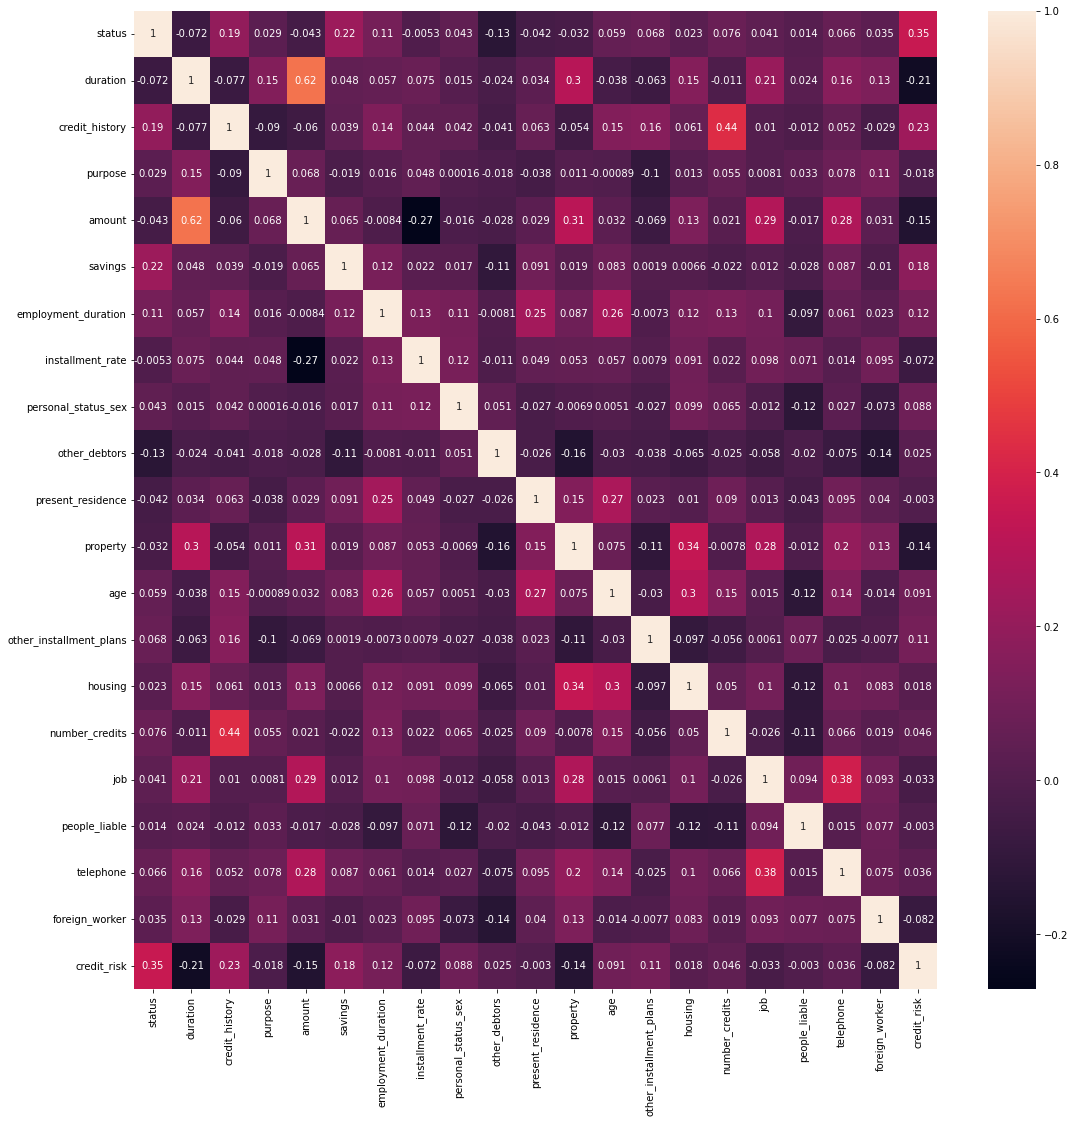

In [9]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True)

Checking the data types

In [10]:
df.dtypes

status                     int64
duration                   int64
credit_history             int64
purpose                    int64
amount                     int64
savings                    int64
employment_duration        int64
installment_rate           int64
personal_status_sex        int64
other_debtors              int64
present_residence          int64
property                   int64
age                        int64
other_installment_plans    int64
housing                    int64
number_credits             int64
job                        int64
people_liable              int64
telephone                  int64
foreign_worker             int64
credit_risk                int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

#### check the unique values of all the input features in the dataset

In [12]:
df.nunique()

status                       4
duration                    33
credit_history               5
purpose                     10
amount                     923
savings                      5
employment_duration          5
installment_rate             4
personal_status_sex          4
other_debtors                3
present_residence            4
property                     4
age                         53
other_installment_plans      3
housing                      3
number_credits               4
job                          4
people_liable                2
telephone                    2
foreign_worker               2
credit_risk                  2
dtype: int64

### Statistics of the dataset

In [13]:
df.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


## Exploratory Data analysis

In [14]:
continuous_variables = ['duration','amount','age']
Discrete_variables= [feature for feature in df.columns if feature not in continuous_variables]

## Univariate Analysis

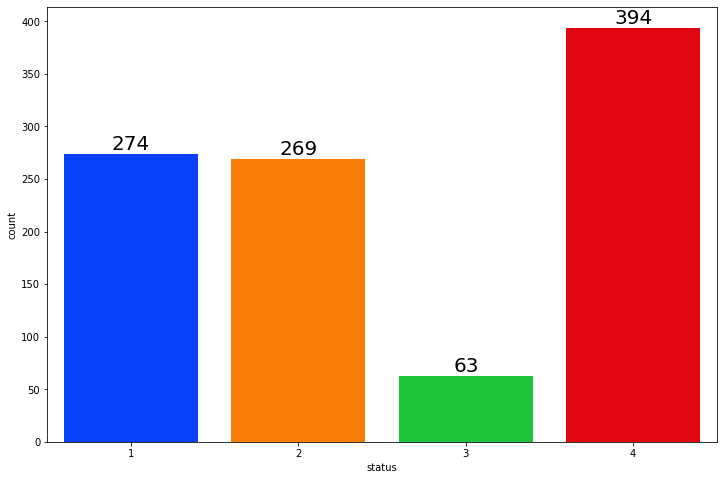

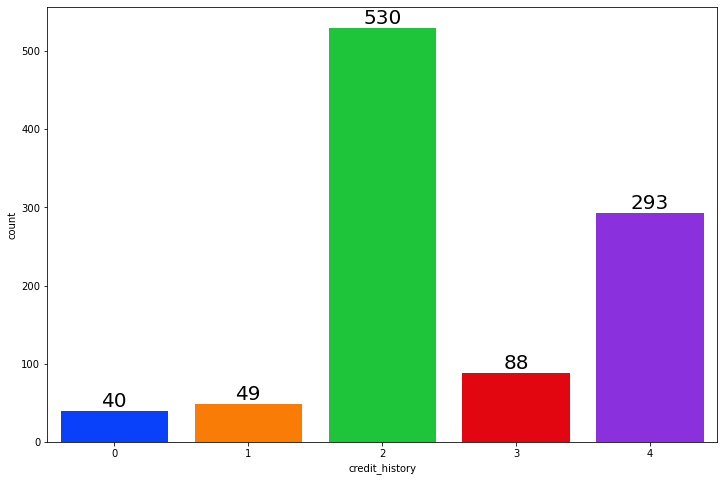

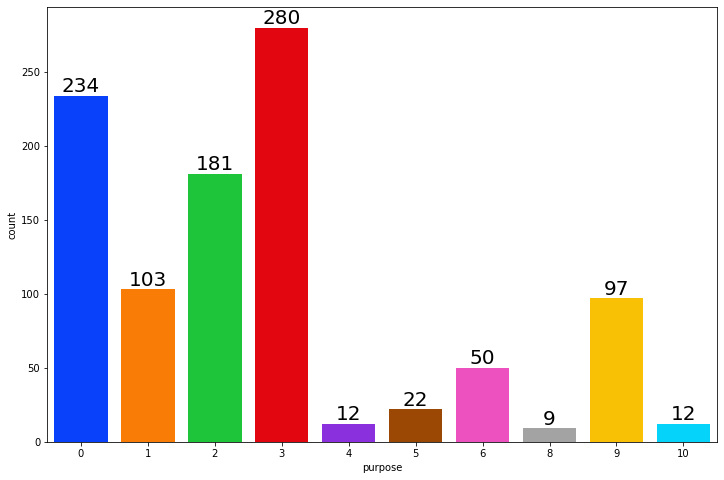

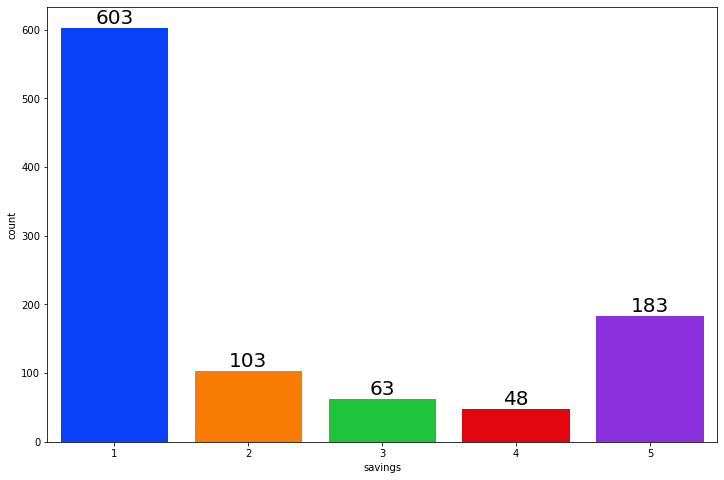

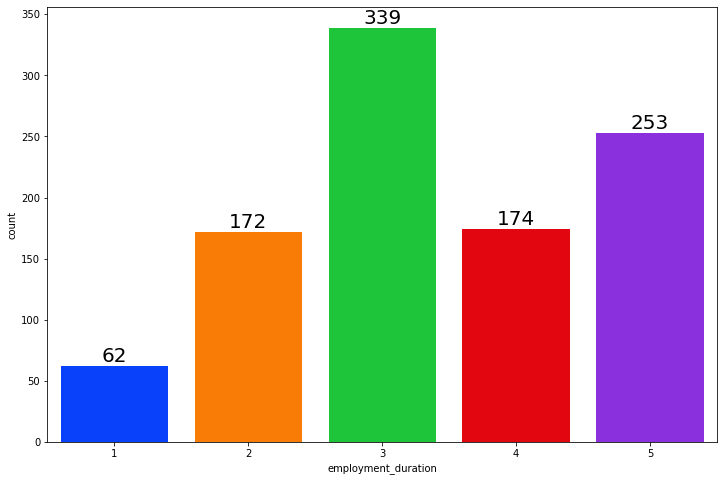

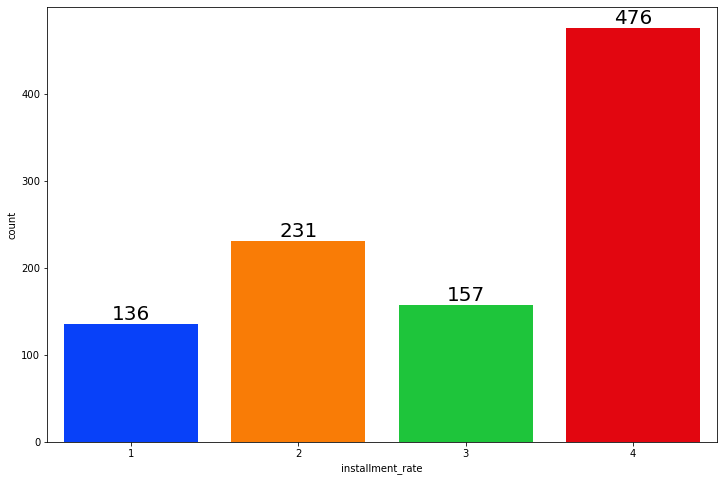

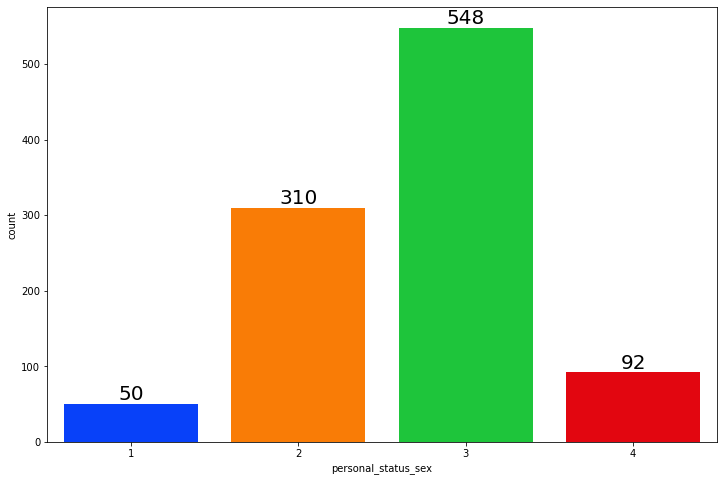

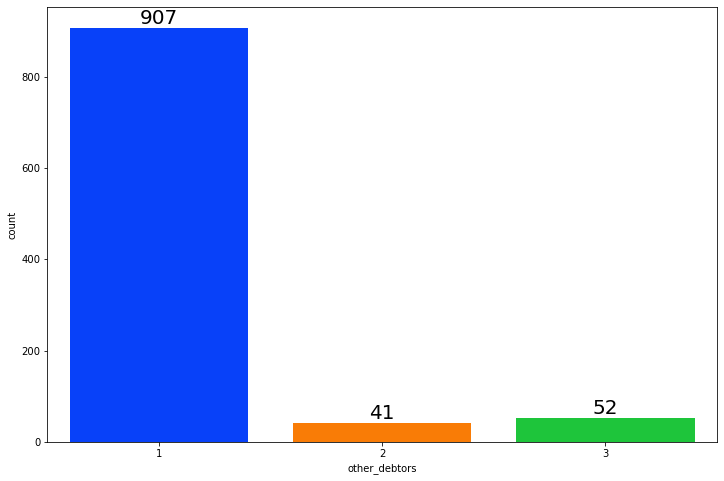

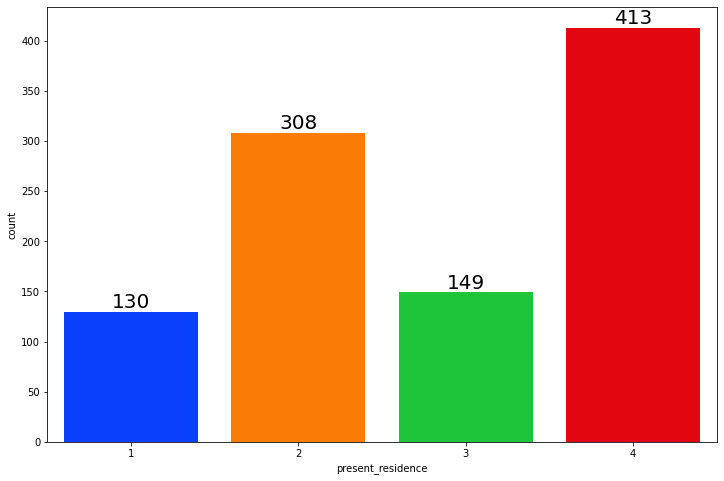

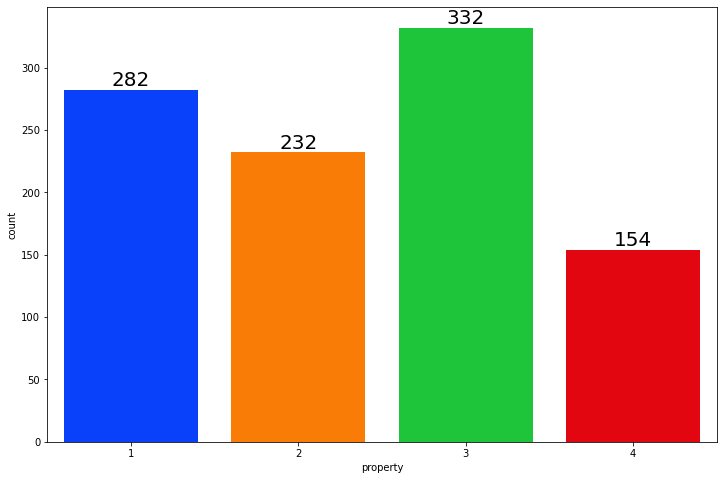

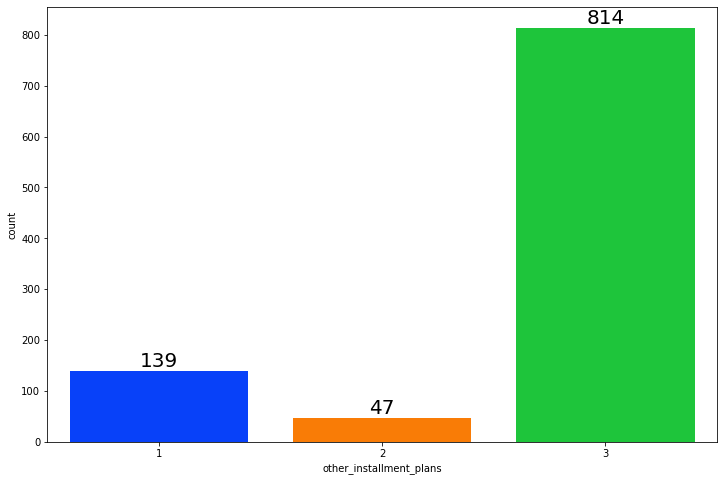

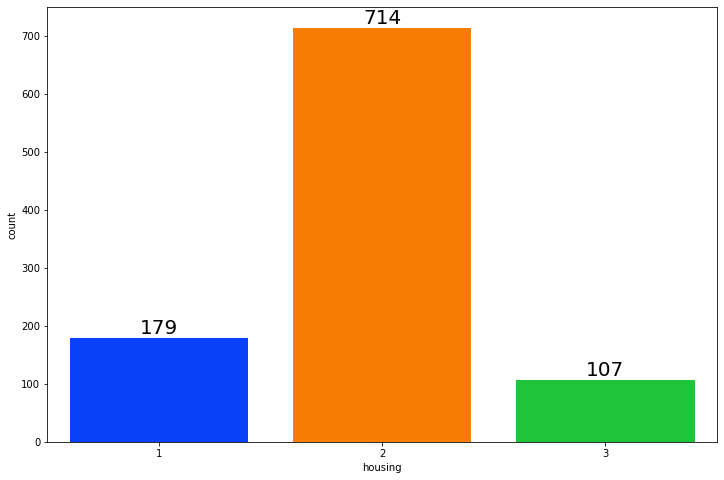

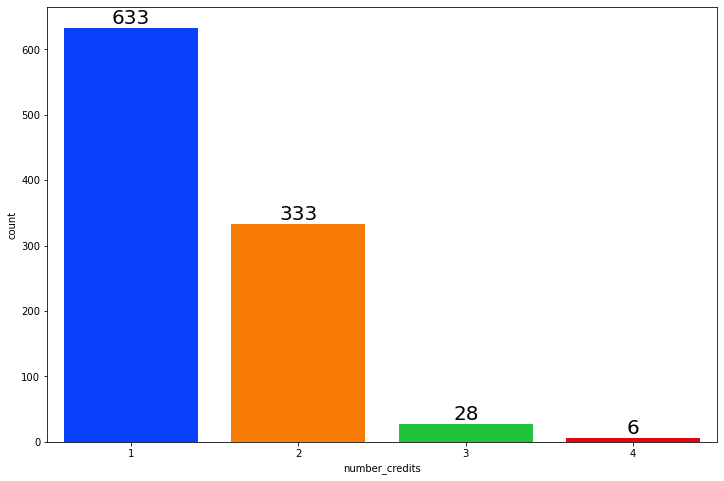

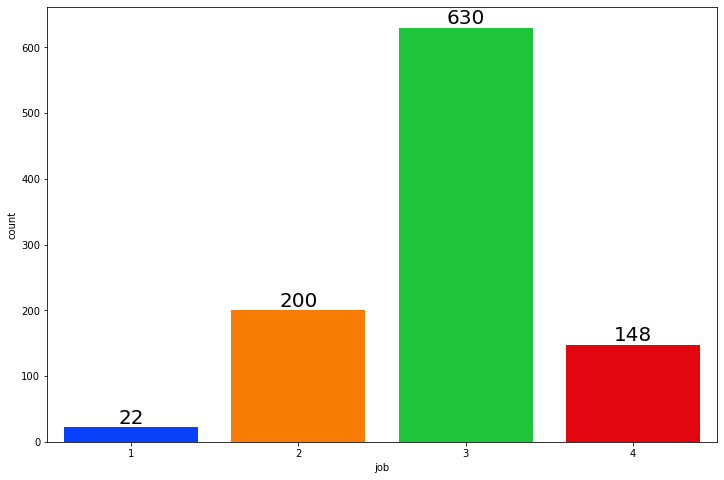

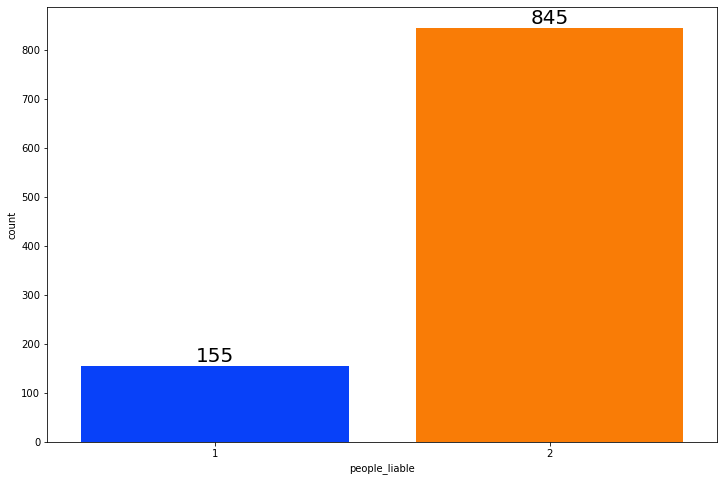

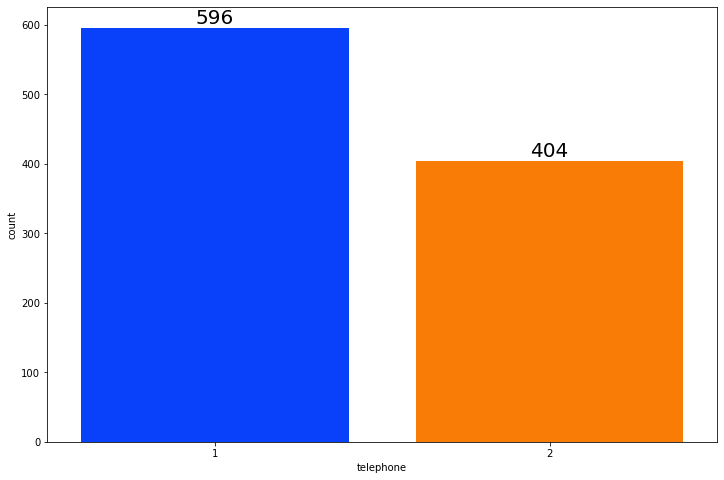

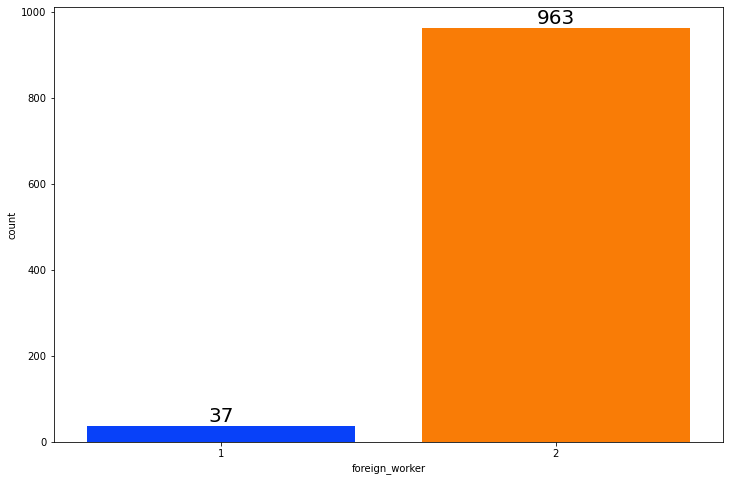

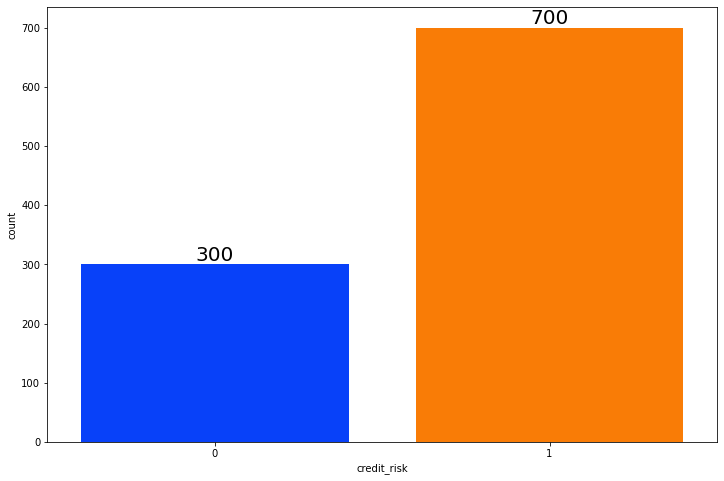

In [15]:
for i in Discrete_variables:
    f,ax=plt.subplots(1,1,figsize=(12,8))
    sns.countplot(x=df[i],data=df,palette = 'bright',saturation=0.95)
    for container in ax.containers:
        ax.bar_label(container,color='black',size=20)
    plt.show()   

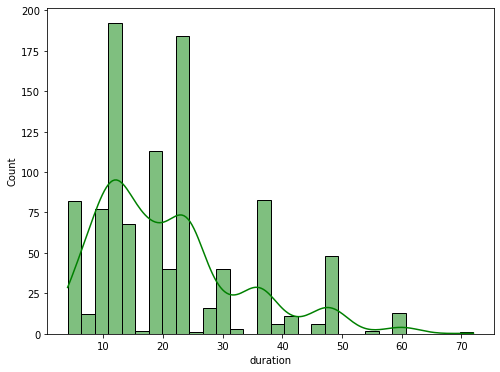

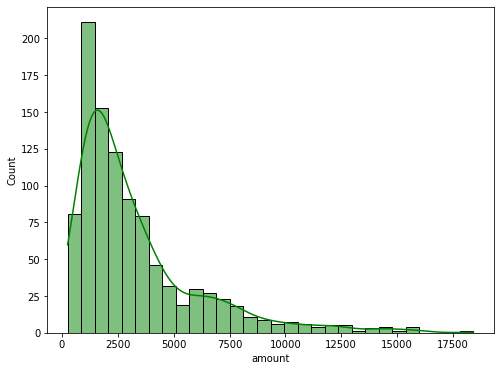

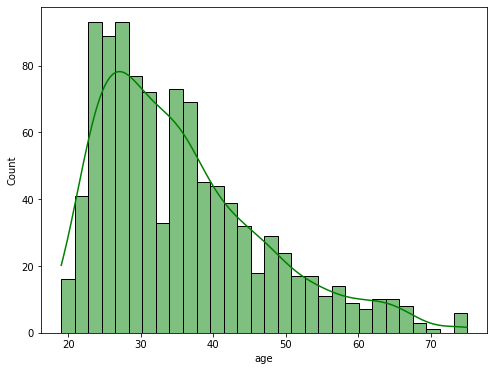

In [16]:
for i in continuous_variables:
    f,ax=plt.subplots(1,1,figsize=(8,6))
    sns.histplot(x=df[i],data=df,bins=30,kde=True,color='g')
    plt.show()

## Bivariate Analysis

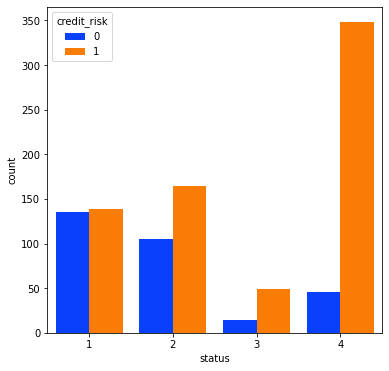

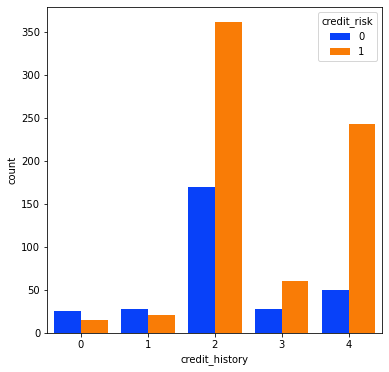

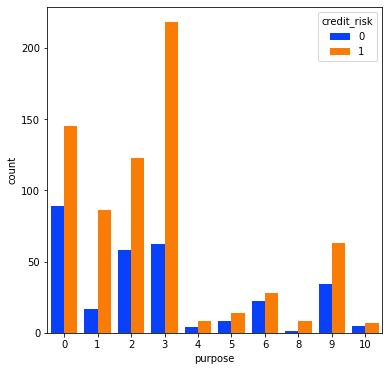

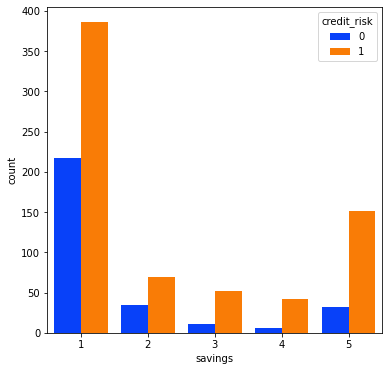

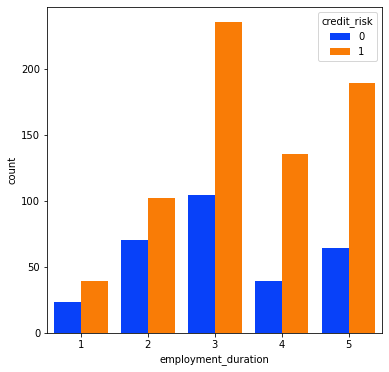

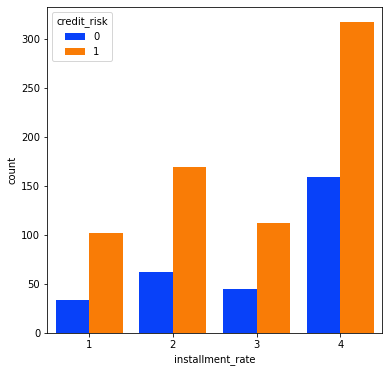

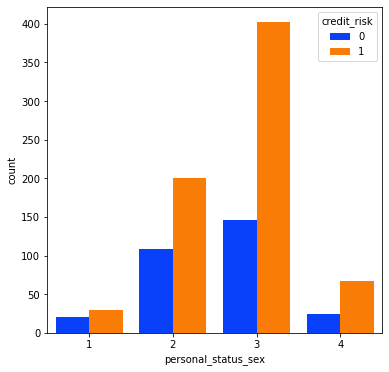

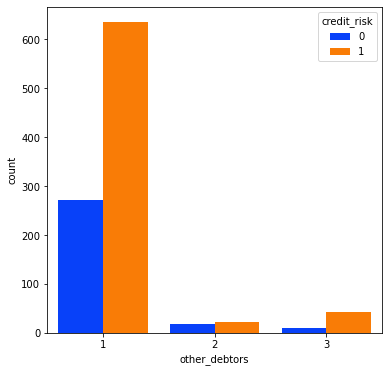

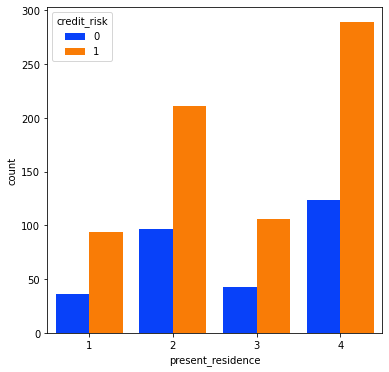

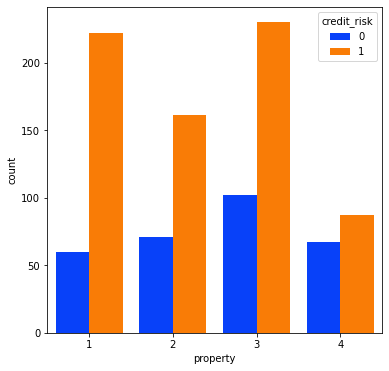

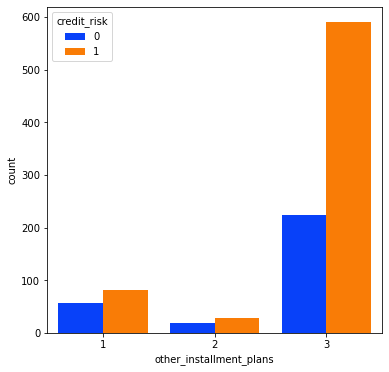

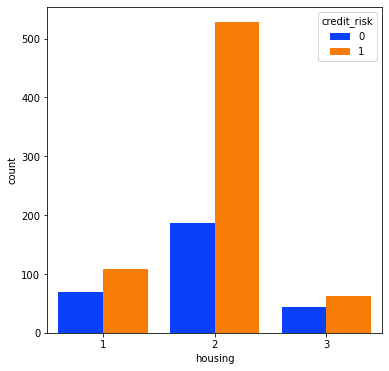

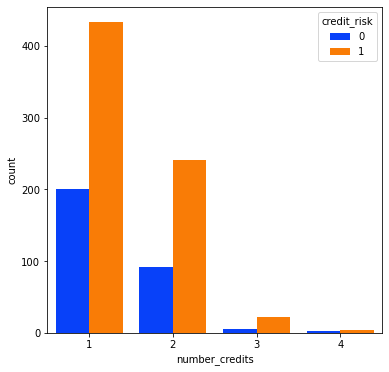

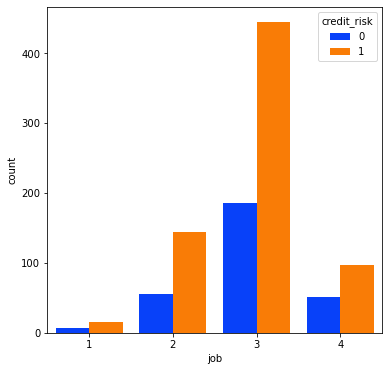

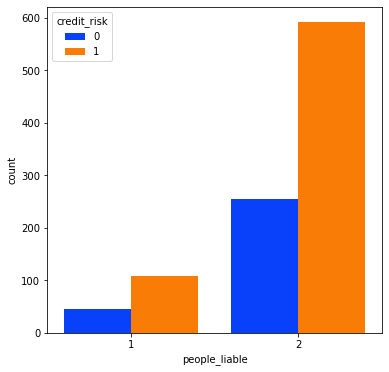

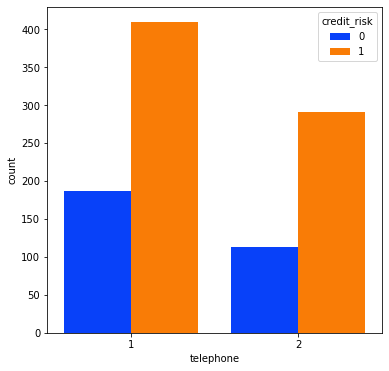

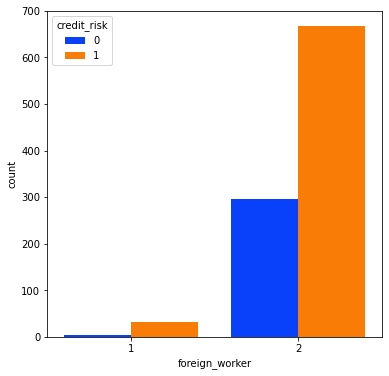

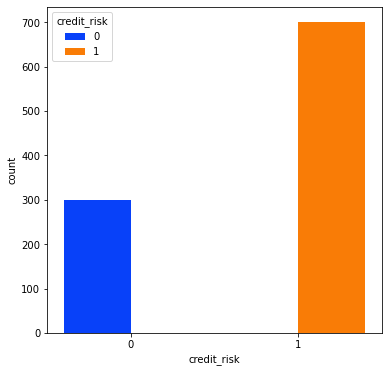

In [17]:
for i in Discrete_variables:
    f,ax=plt.subplots(1,1,figsize=(6,6))
    sns.countplot(x=i,data=df,hue='credit_risk',palette = 'bright',saturation=0.95)
    plt.show()
    

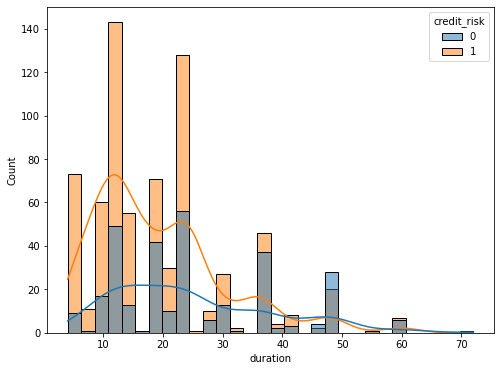

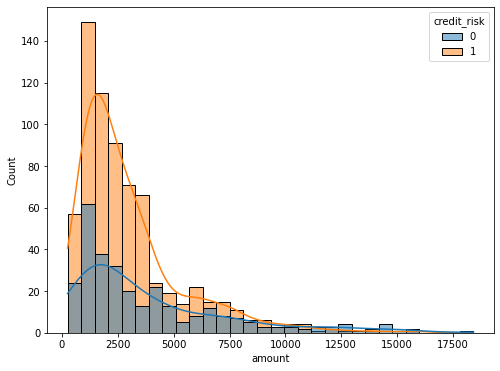

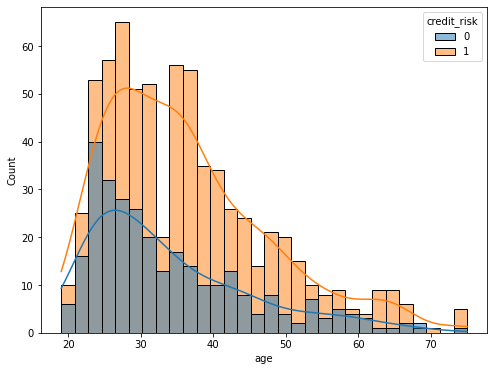

In [18]:
for i in continuous_variables:
    f,ax=plt.subplots(1,1,figsize=(8,6))
    sns.histplot(x=df[i],hue='credit_risk',data=df,bins=30,kde=True,color='g')
    plt.show()

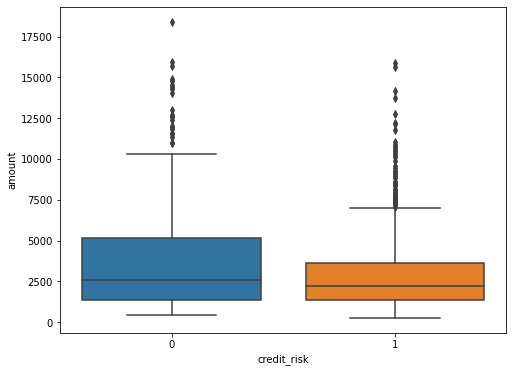

In [19]:
f,ax=plt.subplots(1,1,figsize=(8,6))
sns.boxplot(x='credit_risk',y='amount',data=df)
plt.show()

## Feature Selection 
The Data Contains lot of input features ,so we are going to perform feature selection by using mutual informatin gain.

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(labels=['credit_risk'],axis=1),df['credit_risk'],test_size=0.2,random_state=33)


In [22]:
X_train.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
866,2,12,2,0,1295,1,2,3,2,1,1,3,25,3,1,1,3,2,1,2
909,1,48,0,2,7119,1,3,3,3,1,4,4,53,3,3,2,3,1,1,2
640,1,36,4,2,2348,1,3,3,4,1,2,2,46,3,2,2,3,2,2,2
582,4,24,2,3,3621,2,5,2,3,1,4,3,31,3,2,2,3,2,1,2
516,2,24,3,9,6967,2,4,4,3,1,4,3,36,3,1,1,4,2,2,2


In [23]:
Y_train.head()

866    0
909    0
640    1
582    0
516    1
Name: credit_risk, dtype: int64

In [24]:
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(X_train,Y_train)
mi

array([0.05409574, 0.03818074, 0.02992184, 0.01351798, 0.00776446,
       0.01721327, 0.00693758, 0.00620504, 0.03408033, 0.        ,
       0.        , 0.        , 0.02114751, 0.00263447, 0.00121346,
       0.        , 0.        , 0.00782369, 0.01728827, 0.00395064])

In [25]:
#select the  top 10 important features
from sklearn.feature_selection import SelectKBest
imp_fea = SelectKBest(mutual_info_classif, k=10)
imp_fea.fit(X_train, Y_train)
features = X_train.columns[imp_fea.get_support()]

In [26]:
features

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'installment_rate', 'personal_status_sex', 'other_debtors',
       'people_liable'],
      dtype='object')

In [34]:
new_df=pd.DataFrame(df,columns=features)
new_df['credit_risk']=df['credit_risk']
new_df

,status,duration,credit_history,purpose,amount,savings,installment_rate,personal_status_sex,other_debtors,people_liable,credit_risk
0,1,18,4,2,1049,1,4,2,1,2,1
1,1,9,4,0,2799,1,2,3,1,1,1
2,2,12,2,9,841,2,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,1,1,1
4,1,12,4,0,2171,1,4,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,2,3,1,1,0
996,1,24,2,0,2303,1,4,3,2,2,0
997,4,21,4,0,12680,5,4,3,1,2,0
998,2,12,2,3,6468,5,2,3,1,2,0


### Converting to balanced dataset

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(new_df.iloc[:,0:-1], new_df['credit_risk'])

print('Original dataset shape', len(new_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 1000
Resampled dataset shape 1400


In [38]:
columns = list(new_df.columns)
columns.pop()
balance_df = pd.DataFrame(x_smote, columns=columns)
balance_df['credit_risk']=y_smote

In [39]:
balance_df.head()

,status,duration,credit_history,purpose,amount,savings,installment_rate,personal_status_sex,other_debtors,people_liable,credit_risk
0,1,18,4,2,1049,1,4,2,1,2,1
1,1,9,4,0,2799,1,2,3,1,1,1
2,2,12,2,9,841,2,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,1,1,1
4,1,12,4,0,2171,1,4,3,1,2,1


In [40]:
balance_df['credit_risk'].value_counts()

1    700
0    700
Name: credit_risk, dtype: int64

The above data is converted to balanced dataset

<AxesSubplot:xlabel='credit_risk', ylabel='count'>

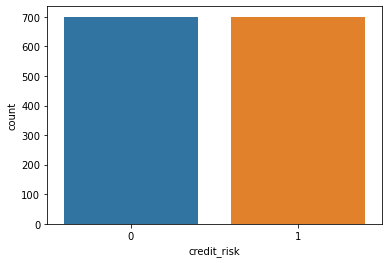

In [41]:
sns.countplot(x='credit_risk', data = balance_df)

# Implementing Logistic Regression


In [42]:
df_log_reg = balance_df.copy()
X = df_log_reg.drop(['credit_risk'],axis=1)
y = df_log_reg['credit_risk']
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

In [44]:
x_train.shape

(1050, 10)

In [45]:
x_test.shape

(350, 10)

In [46]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression()

In [47]:
pred1=logistic.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(y_test,pred1)

In [49]:
accuracy

0.7971428571428572

In [53]:
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty':['l1','l2'], 'solver':['liblinear'],'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy',  verbose = 3, cv = 3)
grid_lr_clf.fit(x_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV 1/3] END C=0.001, penalty=l1, solver=liblinear;, score=0.503 total time=   0.0s
[CV 2/3] END C=0.001, penalty=l1, solver=liblinear;, score=0.503 total time=   0.0s
[CV 3/3] END C=0.001, penalty=l1, solver=liblinear;, score=0.503 total time=   0.0s
[CV 1/3] END C=0.001, penalty=l2, solver=liblinear;, score=0.771 total time=   0.0s
[CV 2/3] END C=0.001, penalty=l2, solver=liblinear;, score=0.789 total time=   0.0s
[CV 3/3] END C=0.001, penalty=l2, solver=liblinear;, score=0.769 total time=   0.0s
[CV 1/3] END C=0.01, penalty=l1, solver=liblinear;, score=0.686 total time=   0.0s
[CV 2/3] END C=0.01, penalty=l1, solver=liblinear;, score=0.723 total time=   0.0s
[CV 3/3] END C=0.01, penalty=l1, solver=liblinear;, score=0.714 total time=   0.0s
[CV 1/3] END C=0.01, penalty=l2, solver=liblinear;, score=0.777 total time=   0.0s
[CV 2/3] END C=0.01, penalty=l2, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/3] END C=0.01,

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy', verbose=3)

In [54]:
grid_lr_clf.best_params_

{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

In [66]:
grid_lr_clf.best_score_

0.7761904761904762

In [ ]:
optimized_clf = grid_lr_clf.best_estimator_

In [67]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(x_train)[:,1]
test_preds = optimized_clf.predict_proba(x_test)[:,1]

In [68]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(x_train)
test_class_preds = optimized_clf.predict(x_test)

In [69]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7742857142857142
The accuracy on test data is  0.8057142857142857
